In [1]:
#libraries 
import pandas as pd
import gzip
from tqdm import tqdm

from datetime import datetime
from datetime import date, time
from dateutil.parser import parse
import numpy as np



from bokeh.plotting import figure, output_notebook, show,output_file,gridplot
from bokeh.models import DatetimeTickFormatter,HoverTool,Span

import json
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [41]:
def distribution (rev):
    data=df.loc[rev]
    print(len(data))
    print(data.iloc[0,1:3])
    plt.figure(figsize=(15,10))
    
    plt.subplot(4,2,1)
    w= np.ones_like(data['overall'])/float(len(data['overall']))
    plt.hist(data['overall'],weights=w)
    plt.title('overall score')
    plt.grid()
    
    plt.subplot(4,2,2)
    w= np.ones_like(data.length_review)/float(len(data.length_review))
    plt.hist(data['length_review'],weights=w)
    plt.grid()
    plt.title('length of reviews')
    
    plt.subplot(4,2,5)
    w= np.ones_like(data.sentiment_pos)/float(len(data.sentiment_pos))
    plt.hist(data['sentiment_pos'],weights=w)
    plt.grid()
    plt.title('positiveness')
    
    plt.subplot(4,2,6)
    w= np.ones_like(data.sentiment_neg)/float(len(data.sentiment_neg))
    plt.hist(data['sentiment_neg'],weights=w)
    plt.grid()
    plt.title('negativeness')
    
    plt.subplot(4,2,3)
    w= np.ones_like(data.helpfulness.dropna())/float(len(data.helpfulness.dropna()))
    plt.hist(data['helpfulness'].dropna(),weights=w)
    plt.grid()
    plt.title('helpfulness')
    
    plt.subplot(4,2,4)
    w= np.ones_like(data.price)/float(len(data.price))
    plt.hist(data['price'],weights=w)
    plt.grid()
    plt.title('price')
    
    plt.subplot(4,2,7)
    plt.hist(data['year'],)
    plt.grid()
    plt.title('year')
    

    plt
    
import itertools
def plot_correlation_matrix(cm, classes,title='Correlation matrix', cmap=plt.cm.RdBu):
    normalize=False
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.clim(-1,1)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

             
np.set_printoptions(precision=2)

def corr (x,y,c):
    p = figure(width=1000, height=500)
    p.circle(X[x],X[y],color=c,alpha=0.5)
    p.legend.location = "top_left"
    p.grid.grid_line_alpha=0
    p.xaxis.axis_label = x
    p.yaxis.axis_label = y
    return p


In [3]:
#load the dataframe for a given product only (is it possible?)
pickle_off = open("electronics_meta_sentiment.pickle","rb")
df = pickle.load(pickle_off)

In [4]:
df=df[df.year>2012]

In [5]:
l=[]
for i in df.index:
    if df.helpful[i][1]==0:
        l.append(None)
    else:
        l.append(df.helpful[i][0]/df.helpful[i][1])
df['helpfulness']=l
del df['helpful']
del df['unixReviewTime']
df['sales_rank']=df['sales_rank'].replace(0, np.nan)

In [6]:
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'reviewText', 'overall',
       'summary', 'reviewTime', 'year', 'length_review', 'title', 'brand',
       'price', 'sub_category_0', 'sub_category_1', 'sales_category',
       'sales_rank', 'score', 'sentiment_com', 'sentiment_pos',
       'sentiment_neg', 'sentiment_neu', 'helpfulness'],
      dtype='object')

In [7]:
df=df.set_index('reviewerID')

In [8]:
reviewers=df.index.unique()
reviewers

Index(['AO94DHGC771SJ', 'A2JXAZZI9PHK9Z', 'A2P5U7BDKKT7FW', 'AAZ084UMH8VZ2',
       'AEZ3CR6BKIROJ', 'A3BY5KCNQZXV5U', 'A7S2B0I67WNWB', 'A3HICVLF4PFFMN',
       'ANSKSPEEAKY7S', 'A2QBZA4S1ROX9Q',
       ...
       'A229MLBHA0GQ36', 'A1FWGUYE67BBVG', 'AXT77ZZJ2XA63', 'AHNQX1408GB4E',
       'A2ITGW4E6U909T', 'A1URLO1PTG3QZ3', 'A3NADOYIRYF1U4', 'A37HFB3GU0VIWN',
       'A33K4B81CKW9P0', 'A1WX5534UX25AN'],
      dtype='object', name='reviewerID', length=167644)

In [29]:
#n=list(map(lambda x:len(df.loc[x]),reviewers))
n=df.groupby('reviewerID').count().asin
count=pd.DataFrame(n)

count=count.sort_values('asin',ascending=False)

In [31]:
p=count.index.values[0]
p

'A2NOW4U7W3F7RI'

In [38]:
X=df.loc[p,['price','overall','helpfulness','length_review','sentiment_pos','sentiment_neg','sentiment_com']]
X.head()

,price,overall,helpfulness,length_review,sentiment_pos,sentiment_neg,sentiment_com
reviewerID,,,,,,,
A2NOW4U7W3F7RI,689.00,5.0,1.0,115,0.147,0.220,-0.9157
A2NOW4U7W3F7RI,22.75,5.0,1.0,78,0.107,0.031,0.6588
A2NOW4U7W3F7RI,15.99,5.0,NaN,53,0.149,0.043,0.6588
A2NOW4U7W3F7RI,16.25,5.0,NaN,101,0.105,0.022,0.7958
A2NOW4U7W3F7RI,149.99,5.0,NaN,66,0.179,0.000,0.9230


154
reviewerName                                                  rpv
reviewText      I had chance to use these lens and they are ab...
Name: A2NOW4U7W3F7RI, dtype: object


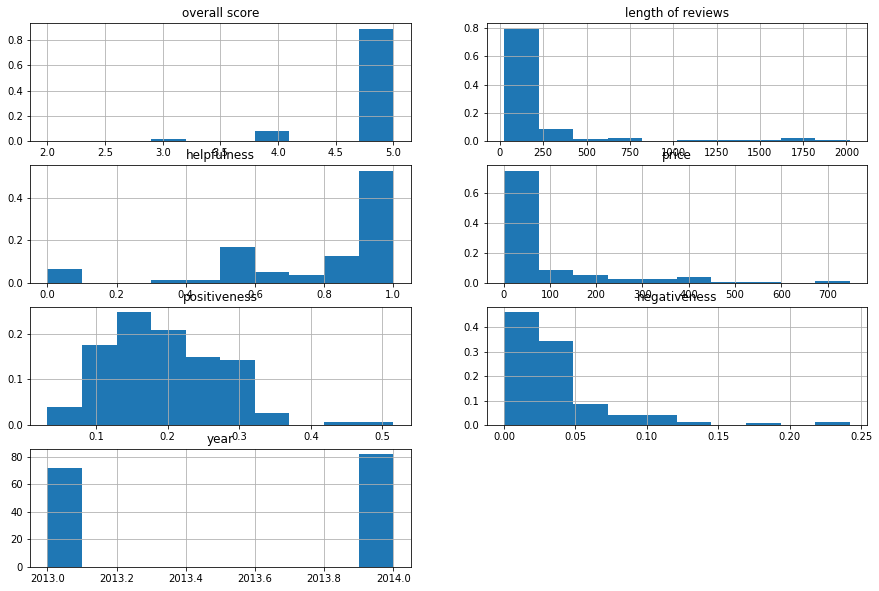

In [42]:
distribution(p)

In [36]:
cm=X.corr()
cm

,price,overall,helpfulness,length_review,sentiment_pos,sentiment_neg,sentiment_com
price,1.000000,-0.339303,-0.005206,0.660383,-0.292467,0.201177,-0.093686
overall,-0.339303,1.000000,0.224266,-0.194585,0.321138,-0.263323,0.406084
helpfulness,-0.005206,0.224266,1.000000,0.055259,-0.020868,-0.098593,0.186058
length_review,0.660383,-0.194585,0.055259,1.000000,-0.341795,-0.079672,0.177999
sentiment_pos,-0.292467,0.321138,-0.020868,-0.341795,1.000000,-0.255381,0.384441
sentiment_neg,0.201177,-0.263323,-0.098593,-0.079672,-0.255381,1.000000,-0.731871
sentiment_com,-0.093686,0.406084,0.186058,0.177999,0.384441,-0.731871,1.000000


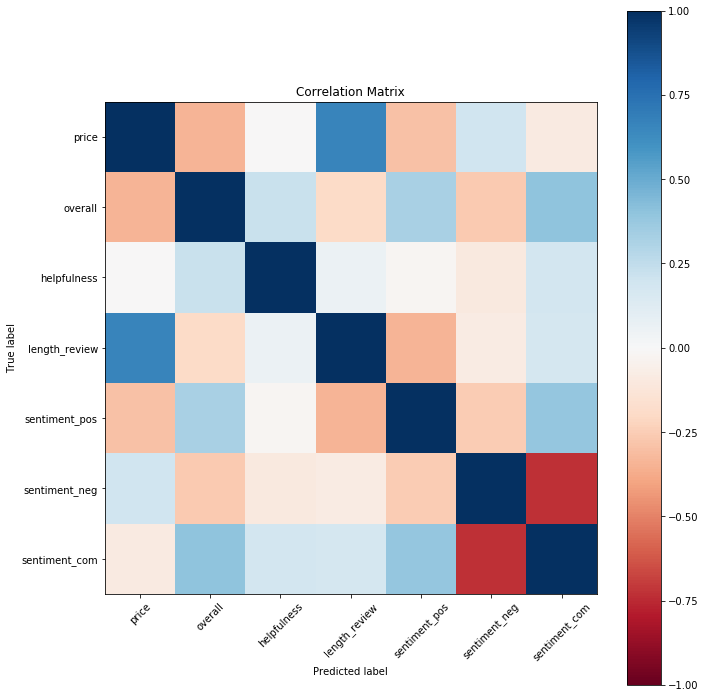

In [37]:

plt.figure(figsize=(10,10))
plot_correlation_matrix(cm, classes=X.columns,title='Correlation Matrix')
plt.show()              

In [43]:

p=corr('length_review','sentiment_pos','navy')
p=corr('length_review','sentiment_neg','red')
show(p)